In [1]:
import os
import pandas as pd
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
import numpy as np
import matplotlib.pyplot as plt

### Load Data

In [2]:
base = os.path.join('..', 'HW3') if os.path.basename(os.getcwd()) != 'HW3' else '.'

X_train = pd.read_csv(os.path.join(base, 'X_train.csv'), header=None)
X_test = pd.read_csv(os.path.join(base, 'X_test.csv'), header=None)
y_train = pd.read_csv(os.path.join(base, 'y_train.csv'), header=None)
y_test = pd.read_csv(os.path.join(base, 'y_test.csv'), header=None)


### 1. Training SVM Classifier with a Linear Kernel

In [3]:
# Train SVM with linear kernel
model = SVC(kernel="linear", random_state=0)
model.fit(X_train, y_train)

# Predictions and accuracies
y_train_pred = model.predict(X_train)
y_test_pred  = model.predict(X_test)

train_acc = accuracy_score(y_train, y_train_pred)
test_acc  = accuracy_score(y_test, y_test_pred)

print(f"Training accuracy: {train_acc:.4f}")
print(f"Testing  accuracy: {test_acc:.4f}")

Training accuracy: 0.8500
Testing  accuracy: 0.7500


c:\Users\shree\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [4]:
# Function to plot decision boundaries 
def plot_decision_boundary(clf, X, y): 
    """ Plots the decision boundary for a given classifier. 
    Parameters: clf : trained SVM classifier. 
    X : numpy array of shape (n_samples, 2). The input feature matrix. 
    y : numpy array of shape (n_samples,). The target labels. """ 
    # Define the boundaries of the plot 
    x_min, x_max = X[:, 0].min()- 1, X[:, 0].max() + 1 
    y_min, y_max = X[:, 1].min()- 1, X[:, 1].max() + 1 
    # Create a grid of points 
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100), np.linspace( y_min, y_max, 100)) 
    # Predict class labels for each point in the grid 
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()]) 
    Z = Z.reshape(xx.shape)
    # Plot the decision boundary 
    plt.contourf(xx, yy, Z, alpha=0.3)
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', cmap=plt.cm. coolwarm) 
    plt.xlabel("Feature 1") 
    plt.ylabel("Feature 2") 
    plt.show()

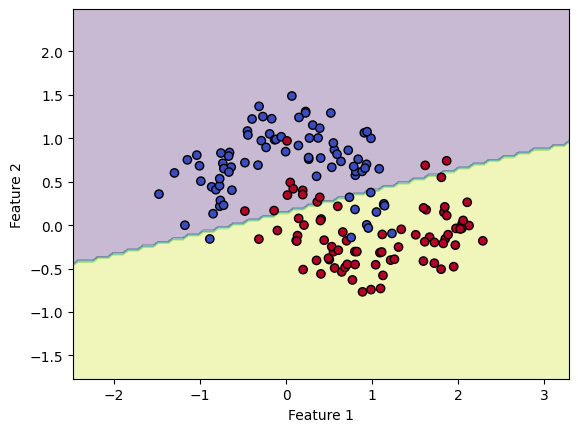

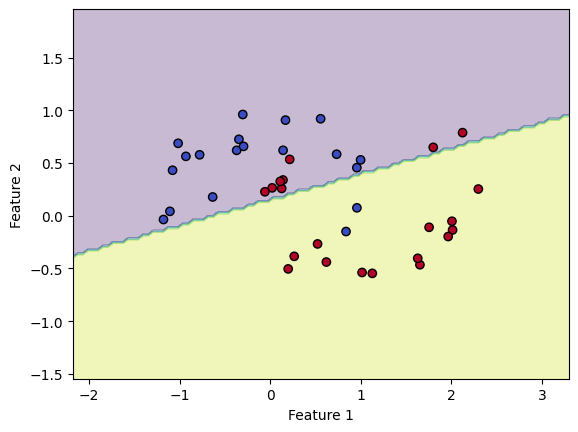

In [5]:
# Plotting training data
plot_decision_boundary(model, X_train.values, y_train.values.ravel())

# Plotting testing data
plot_decision_boundary(model, X_test.values, y_test.values.ravel())

In [6]:
# Train SVM with RBF kernel
model_rbf = SVC(kernel='rbf', random_state=0)
model_rbf.fit(X_train, y_train.values.ravel())

# Predictions and accuracies
y_train_pred_rbf = model_rbf.predict(X_train)
y_test_pred_rbf  = model_rbf.predict(X_test)

train_acc_rbf = accuracy_score(y_train, y_train_pred_rbf)
test_acc_rbf  = accuracy_score(y_test, y_test_pred_rbf)

print(f"RBF SVM - Training accuracy: {train_acc_rbf:.4f}")
print(f"RBF SVM - Testing  accuracy: {test_acc_rbf:.4f}")


RBF SVM - Training accuracy: 0.9688
RBF SVM - Testing  accuracy: 0.9250


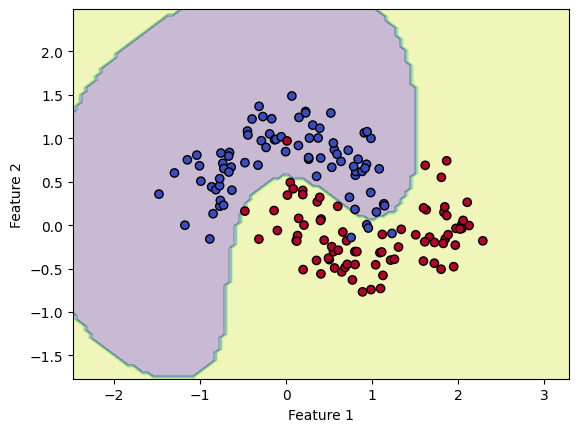

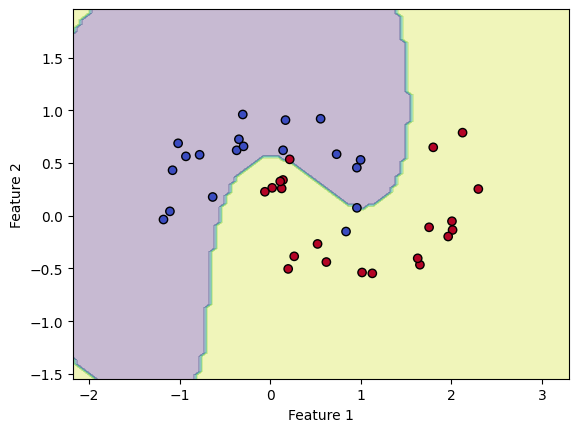

In [7]:
# Plot decision boundaries on training and testing sets
plot_decision_boundary(model_rbf, X_train.values, y_train.values.ravel())
plot_decision_boundary(model_rbf, X_test.values, y_test.values.ravel())

## 5. Neural Network (NN) Classification

In [8]:
import torch
import torch.nn as nn
import torch.optim as optim

In [21]:
# Feedforward Neural Network
class FNN(nn.Module):
    def __init__(self, input_size=2, hidden1=16, hidden2=8, output_size=1):
        super().__init__()
        self.net = nn.Sequential(
            nn.Linear(input_size, hidden1),
            nn.ReLU(),
            nn.Linear(hidden1, hidden2),
            nn.ReLU(),
            nn.Linear(hidden2, output_size),
            nn.Sigmoid()  # sigmoid for binary output
        )

    def forward(self, x):
        return self.net(x)

In [22]:
# reproducibility
torch.manual_seed(0)
np.random.seed(0)

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Prepare data (use existing X_train, y_train, X_test, y_test DataFrames)
X_train_t = torch.tensor(X_train.values, dtype=torch.float32).to(device)
y_train_t = torch.tensor(y_train.values.reshape(-1, 1), dtype=torch.float32).to(device)
X_test_t  = torch.tensor(X_test.values,  dtype=torch.float32).to(device)
y_test_t  = torch.tensor(y_test.values.reshape(-1, 1),  dtype=torch.float32).to(device)

# Loss and optimizer
criterion = nn.BCELoss()           # Binary Cross-Entropy Loss


In [23]:
# Train and evaluate MLPs with 1, 2, and 3 hidden layers (16 neurons each)
# Uses existing tensors/objects: X_train_t, y_train_t, X_test_t, y_test_t, device, criterion

def make_fnn(n_hidden_layers=1, hidden_size=16, input_size=2, output_size=1):
    layers = []
    in_features = input_size
    for _ in range(n_hidden_layers):
        layers.append(nn.Linear(in_features, hidden_size))
        layers.append(nn.ReLU())
        in_features = hidden_size
    layers.append(nn.Linear(in_features, output_size))
    layers.append(nn.Sigmoid())
    return nn.Sequential(*layers)

def train_and_evaluate(model, X_train, y_train, X_test, y_test, epochs=200, lr=0.01):
    model = model.to(device)
    optimizer = optim.Adam(model.parameters(), lr=lr)
    for epoch in range(epochs):
        model.train()
        optimizer.zero_grad()
        out = model(X_train)
        loss = criterion(out, y_train)
        loss.backward()
        optimizer.step()
    model.eval()
    with torch.no_grad():
        out_train = model(X_train)
        pred_train = (out_train >= 0.5).float()
        train_acc = (pred_train.eq(y_train).float().mean().item())
        out_test = model(X_test)
        pred_test = (out_test >= 0.5).float()
        test_acc = (pred_test.eq(y_test).float().mean().item())
    return train_acc, test_acc

# results now contains (train_acc, test_acc) for each architecture

In [12]:
results = {}
configs = {
    '1_hidden_16': 1,
    '2_hidden_16': 2,
    '3_hidden_16': 3
}

for name, n_layers in configs.items():
    torch.manual_seed(0)   # reset initialization for fair comparison
    np.random.seed(0)
    model_i = make_fnn(n_hidden_layers=n_layers, hidden_size=16)
    train_acc, test_acc = train_and_evaluate(model_i, X_train_t, y_train_t, X_test_t, y_test_t, epochs=200, lr=0.01)
    results[name] = (train_acc, test_acc)
    print(f"{name}: train_acc={train_acc:.4f}, test_acc={test_acc:.4f}")

1_hidden_16: train_acc=0.9250, test_acc=0.9000
2_hidden_16: train_acc=0.9688, test_acc=0.9500
3_hidden_16: train_acc=0.9688, test_acc=0.9750


## 6. CNN-based Image Classification on CIFAR-10.

In [15]:
from torchvision import datasets, transforms 
from torch.utils.data import DataLoader 

In [16]:
# Define a transform to convert images to tensors and normalize them
transform = transforms.Compose([ 
    transforms.ToTensor(), # Convert PIL image to tensor 
    transforms.Normalize((0.4914, 0.4822, 0.4465), # Mean for each channel 
                         (0.2470, 0.2435, 0.2616)) # Std for each channel 
                         ]) 
# Load the CIFAR-10 training dataset with transformations applied 
train_dataset = datasets.CIFAR10(root='./data', train=True, transform=transform, download=True) 
# Load the CIFAR-10 test dataset with the same transformations 
test_dataset = datasets.CIFAR10(root='./data', train=False, transform=transform, download=True) 


Files already downloaded and verified
Files already downloaded and verified


In [17]:
batch_size = 64

# Create a data loader for the training set 
train_loader = DataLoader(dataset=train_dataset, 
                          batch_size=batch_size, # Number of samples per batch
                           shuffle=True) # Shuffle the data each epoch 

# Create a data loader for the test set 
test_loader = DataLoader(dataset=test_dataset, 
                         batch_size=batch_size, # Same batch size as training 
                         shuffle=False) # No shuffling for test data

#### 6.1 CNN architecture

In [18]:
# CNN training on CIFAR-10
class SimpleCNN(nn.Module):
    def __init__(self, num_classes=10):
        super().__init__()
        self.features = nn.Sequential(
            nn.Conv2d(3, 32, kernel_size=3, padding=1), nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2),
            nn.Conv2d(32, 64, kernel_size=3, padding=1), nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2),
            nn.Conv2d(64, 128, kernel_size=3, padding=1), nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2)
        )
        self.classifier = nn.Sequential(
            nn.Flatten(),
            nn.Linear(128 * 4 * 4, 256), nn.ReLU(),
            nn.Linear(256, num_classes)  # logits for CrossEntropyLoss
        )

    def forward(self, x):
        x = self.features(x)
        x = self.classifier(x)
        return x

Epoch 01/20 - loss: 1.3520 - train_acc: 0.5112 - test_acc: 0.6206
Epoch 02/20 - loss: 0.9123 - train_acc: 0.6794 - test_acc: 0.7051
Epoch 03/20 - loss: 0.7213 - train_acc: 0.7472 - test_acc: 0.7420
Epoch 04/20 - loss: 0.5921 - train_acc: 0.7937 - test_acc: 0.7503
Epoch 05/20 - loss: 0.4843 - train_acc: 0.8306 - test_acc: 0.7464
Epoch 06/20 - loss: 0.3959 - train_acc: 0.8609 - test_acc: 0.7536
Epoch 07/20 - loss: 0.3090 - train_acc: 0.8905 - test_acc: 0.7520
Epoch 08/20 - loss: 0.2397 - train_acc: 0.9153 - test_acc: 0.7620
Epoch 09/20 - loss: 0.1921 - train_acc: 0.9322 - test_acc: 0.7523
Epoch 10/20 - loss: 0.1489 - train_acc: 0.9467 - test_acc: 0.7514
Epoch 11/20 - loss: 0.1359 - train_acc: 0.9518 - test_acc: 0.7423
Epoch 12/20 - loss: 0.1118 - train_acc: 0.9599 - test_acc: 0.7514
Epoch 13/20 - loss: 0.1068 - train_acc: 0.9622 - test_acc: 0.7473
Epoch 14/20 - loss: 0.0883 - train_acc: 0.9688 - test_acc: 0.7526
Epoch 15/20 - loss: 0.0916 - train_acc: 0.9683 - test_acc: 0.7446
Epoch 16/2

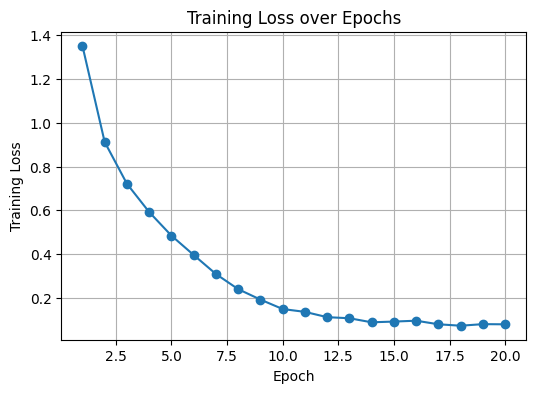

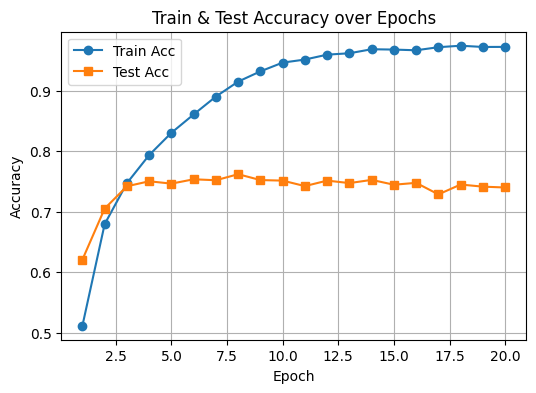

In [36]:
# Hyperparameters
lr = 0.001
n_epochs = 20
batch_size = 64

# Model, loss, optimizer
cnn_model = SimpleCNN(num_classes=10).to(device)
criterion_cnn = nn.CrossEntropyLoss()
optimizer_cnn = optim.Adam(cnn_model.parameters(), lr=lr)

train_losses = []
train_accs = []
test_accs = []

for epoch in range(1, n_epochs + 1):
    cnn_model.train()
    running_loss = 0.0
    running_corrects = 0
    total_train = 0

    for images, labels in train_loader:
        images = images.to(device)
        labels = labels.to(device)

        optimizer_cnn.zero_grad()
        outputs = cnn_model(images)          # logits
        loss = criterion_cnn(outputs, labels)
        loss.backward()
        optimizer_cnn.step()

        batch_size_curr = images.size(0)
        running_loss += loss.item() * batch_size_curr
        preds = outputs.argmax(dim=1)
        running_corrects += (preds == labels).sum().item()
        total_train += batch_size_curr

    epoch_loss = running_loss / total_train
    epoch_train_acc = running_corrects / total_train

    # Evaluate on test set
    cnn_model.eval()
    test_corrects = 0
    total_test = 0
    with torch.no_grad():
        for images, labels in test_loader:
            images = images.to(device)
            labels = labels.to(device)
            outputs = cnn_model(images)
            preds = outputs.argmax(dim=1)
            test_corrects += (preds == labels).sum().item()
            total_test += images.size(0)

    epoch_test_acc = test_corrects / total_test

    train_losses.append(epoch_loss)
    train_accs.append(epoch_train_acc)
    test_accs.append(epoch_test_acc)

    print(f"Epoch {epoch:02d}/{n_epochs} - loss: {epoch_loss:.4f} - train_acc: {epoch_train_acc:.4f} - test_acc: {epoch_test_acc:.4f}")


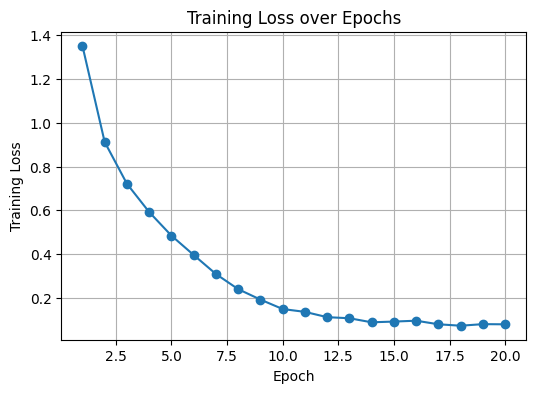

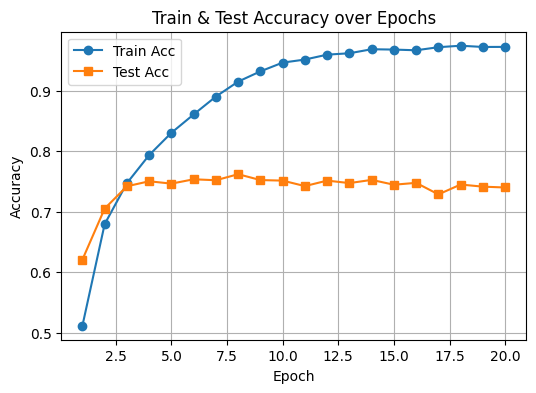

In [37]:
# Plot training loss over epochs
plt.figure(figsize=(6,4))
plt.plot(range(1, n_epochs+1), train_losses, marker='o')
plt.xlabel("Epoch")
plt.ylabel("Training Loss")
plt.title("Training Loss over Epochs")
plt.grid(True)
plt.show()

# Plot training and testing accuracy over epochs
plt.figure(figsize=(6,4))
plt.plot(range(1, n_epochs+1), train_accs, label='Train Acc', marker='o')
plt.plot(range(1, n_epochs+1), test_accs,  label='Test Acc',  marker='s')
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.title("Train & Test Accuracy over Epochs")
plt.legend()
plt.grid(True)
plt.show()

In [19]:
def train_cnn(model, optimizer, train_loader, test_loader):
    criterion_cnn = nn.CrossEntropyLoss()

    train_losses = []
    train_accs = []
    test_accs = []

    for epoch in range(1, n_epochs + 1):
        model.train()
        running_loss = 0.0
        running_corrects = 0
        total_train = 0

        for images, labels in train_loader:
            images = images.to(device)
            labels = labels.to(device)

            optimizer.zero_grad()
            outputs = model(images)
            loss = criterion_cnn(outputs, labels)
            loss.backward()
            optimizer.step()

            bs = images.size(0)
            running_loss += loss.item() * bs
            preds = outputs.argmax(dim=1)
            running_corrects += (preds == labels).sum().item()
            total_train += bs

        epoch_loss = running_loss / total_train
        epoch_train_acc = running_corrects / total_train

        # Evaluate on test set
        model.eval()
        test_corrects = 0
        total_test = 0
        with torch.no_grad():
            for images, labels in test_loader:
                images = images.to(device)
                labels = labels.to(device)
                outputs = model(images)
                preds = outputs.argmax(dim=1)
                test_corrects += (preds == labels).sum().item()
                total_test += images.size(0)

        epoch_test_acc = test_corrects / total_test

        train_losses.append(epoch_loss)
        train_accs.append(epoch_train_acc)
        test_accs.append(epoch_test_acc)

        print(f"lr={lr:.4g} Epoch {epoch:02d}/{n_epochs} - loss: {epoch_loss:.4f} - train_acc: {epoch_train_acc:.4f} - test_acc: {epoch_test_acc:.4f}")
        
    return train_losses, train_accs, test_accs


lr=0.01 Epoch 01/20 - loss: 2.3094 - train_acc: 0.1005 - test_acc: 0.1000
lr=0.01 Epoch 02/20 - loss: 2.3035 - train_acc: 0.0999 - test_acc: 0.1000
lr=0.01 Epoch 03/20 - loss: 2.3036 - train_acc: 0.0986 - test_acc: 0.1000
lr=0.01 Epoch 04/20 - loss: 2.3036 - train_acc: 0.0988 - test_acc: 0.1000
lr=0.01 Epoch 05/20 - loss: 2.3036 - train_acc: 0.0995 - test_acc: 0.1000
lr=0.01 Epoch 06/20 - loss: 2.3035 - train_acc: 0.1004 - test_acc: 0.1000
lr=0.01 Epoch 07/20 - loss: 2.3036 - train_acc: 0.0997 - test_acc: 0.1000
lr=0.01 Epoch 08/20 - loss: 2.3037 - train_acc: 0.0988 - test_acc: 0.1000
lr=0.01 Epoch 09/20 - loss: 2.3036 - train_acc: 0.0983 - test_acc: 0.1000
lr=0.01 Epoch 10/20 - loss: 2.3036 - train_acc: 0.0982 - test_acc: 0.1000
lr=0.01 Epoch 11/20 - loss: 2.3036 - train_acc: 0.0991 - test_acc: 0.1000
lr=0.01 Epoch 12/20 - loss: 2.3036 - train_acc: 0.0988 - test_acc: 0.1000
lr=0.01 Epoch 13/20 - loss: 2.3036 - train_acc: 0.0992 - test_acc: 0.1000
lr=0.01 Epoch 14/20 - loss: 2.3035 - t

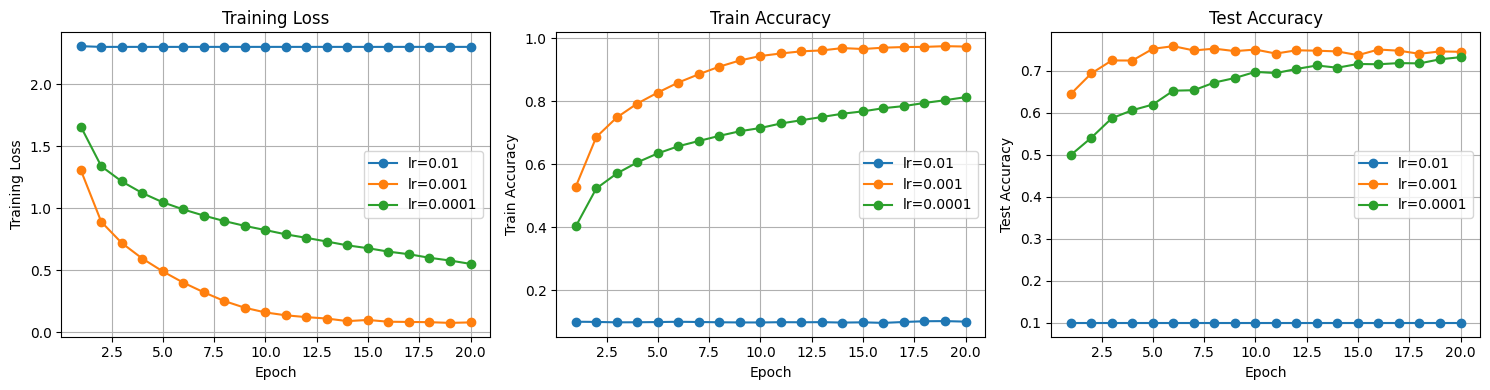

lr=0.01: final_train_acc=0.1009, final_test_acc=0.1000
lr=0.001: final_train_acc=0.9735, final_test_acc=0.7455
lr=0.0001: final_train_acc=0.8130, final_test_acc=0.7327

Observed effect of learning rate (brief):
- Large lr (0.01): converges faster but can be unstable or overshoot; may lead to higher loss variance.
- Medium lr (0.001): good trade-off — stable convergence and strong final performance.
- Small lr (0.0001): very stable but converges slowly and may not reach best accuracy within given epochs.


In [ ]:
# Train CNN with different learning rates (batch_size is already 64 via existing train_loader/test_loader)
lr_list = [0.01, 0.001, 0.0001]
history = {}

for lr in lr_list:
    torch.manual_seed(0)
    np.random.seed(0)

    model = SimpleCNN(num_classes=10).to(device)
    optimizer = optim.Adam(model.parameters(), lr=lr)

    train_losses = []
    train_accs = []
    test_accs = []

    for epoch in range(1, n_epochs + 1):
        model.train()
        running_loss = 0.0
        running_corrects = 0
        total_train = 0

        for images, labels in train_loader:
            images = images.to(device)
            labels = labels.to(device)

            optimizer.zero_grad()
            outputs = model(images)
            loss = criterion_cnn(outputs, labels)
            loss.backward()
            optimizer.step()

            bs = images.size(0)
            running_loss += loss.item() * bs
            preds = outputs.argmax(dim=1)
            running_corrects += (preds == labels).sum().item()
            total_train += bs

        epoch_loss = running_loss / total_train
        epoch_train_acc = running_corrects / total_train

        # Evaluate on test set
        model.eval()
        test_corrects = 0
        total_test = 0
        with torch.no_grad():
            for images, labels in test_loader:
                images = images.to(device)
                labels = labels.to(device)
                outputs = model(images)
                preds = outputs.argmax(dim=1)
                test_corrects += (preds == labels).sum().item()
                total_test += images.size(0)

        epoch_test_acc = test_corrects / total_test

        train_losses.append(epoch_loss)
        train_accs.append(epoch_train_acc)
        test_accs.append(epoch_test_acc)

        print(f"lr={lr:.4g} Epoch {epoch:02d}/{n_epochs} - loss: {epoch_loss:.4f} - train_acc: {epoch_train_acc:.4f} - test_acc: {epoch_test_acc:.4f}")

    history[lr] = {
        'loss': train_losses,
        'train_acc': train_accs,
        'test_acc': test_accs
    }
    # free memory of this model
    del model, optimizer
    torch.cuda.empty_cache() if torch.cuda.is_available() else None

# Plot results: loss, train acc, test acc (each plot compares the learning rates)
epochs = range(1, n_epochs + 1)
plt.figure(figsize=(15,4))

plt.subplot(1,3,1)
for lr in lr_list:
    plt.plot(epochs, history[lr]['loss'], marker='o', label=f"lr={lr}")
plt.xlabel("Epoch"); plt.ylabel("Training Loss"); plt.title("Training Loss")
plt.grid(True); plt.legend()

plt.subplot(1,3,2)
for lr in lr_list:
    plt.plot(epochs, history[lr]['train_acc'], marker='o', label=f"lr={lr}")
plt.xlabel("Epoch"); plt.ylabel("Train Accuracy"); plt.title("Train Accuracy")
plt.grid(True); plt.legend()

plt.subplot(1,3,3)
for lr in lr_list:
    plt.plot(epochs, history[lr]['test_acc'], marker='o', label=f"lr={lr}")
plt.xlabel("Epoch"); plt.ylabel("Test Accuracy"); plt.title("Test Accuracy")
plt.grid(True); plt.legend()

plt.tight_layout()
plt.show()

# Short summary (printed)
for lr in lr_list:
    final_train = history[lr]['train_acc'][-1]
    final_test = history[lr]['test_acc'][-1]
    print(f"lr={lr:.4g}: final_train_acc={final_train:.4f}, final_test_acc={final_test:.4f}")

In [ ]:


print("\nObserved effect of learning rate (brief):")
print("- Large lr (0.01): converges faster but can be unstable or overshoot; may lead to higher loss variance.")
print("- Medium lr (0.001): good trade-off — stable convergence and strong final performance.")
print("- Small lr (0.0001): very stable but converges slowly and may not reach best accuracy within given epochs.")

# 6.2.b

lr=0.001 Epoch 01/20 - loss: 1.2843 - train_acc: 0.5365 - test_acc: 0.6430
lr=0.001 Epoch 02/20 - loss: 0.8712 - train_acc: 0.6942 - test_acc: 0.7025
lr=0.001 Epoch 03/20 - loss: 0.7024 - train_acc: 0.7530 - test_acc: 0.7363
lr=0.001 Epoch 04/20 - loss: 0.5834 - train_acc: 0.7952 - test_acc: 0.7258
lr=0.001 Epoch 05/20 - loss: 0.4835 - train_acc: 0.8302 - test_acc: 0.7486
lr=0.001 Epoch 06/20 - loss: 0.4026 - train_acc: 0.8568 - test_acc: 0.7554
lr=0.001 Epoch 07/20 - loss: 0.3289 - train_acc: 0.8833 - test_acc: 0.7495
lr=0.001 Epoch 08/20 - loss: 0.2726 - train_acc: 0.9038 - test_acc: 0.7445
lr=0.001 Epoch 09/20 - loss: 0.2205 - train_acc: 0.9213 - test_acc: 0.7475
lr=0.001 Epoch 10/20 - loss: 0.1888 - train_acc: 0.9321 - test_acc: 0.7391
lr=0.001 Epoch 11/20 - loss: 0.1636 - train_acc: 0.9411 - test_acc: 0.7486
lr=0.001 Epoch 12/20 - loss: 0.1525 - train_acc: 0.9469 - test_acc: 0.7390
lr=0.001 Epoch 13/20 - loss: 0.1356 - train_acc: 0.9522 - test_acc: 0.7454
lr=0.001 Epoch 14/20 - lo

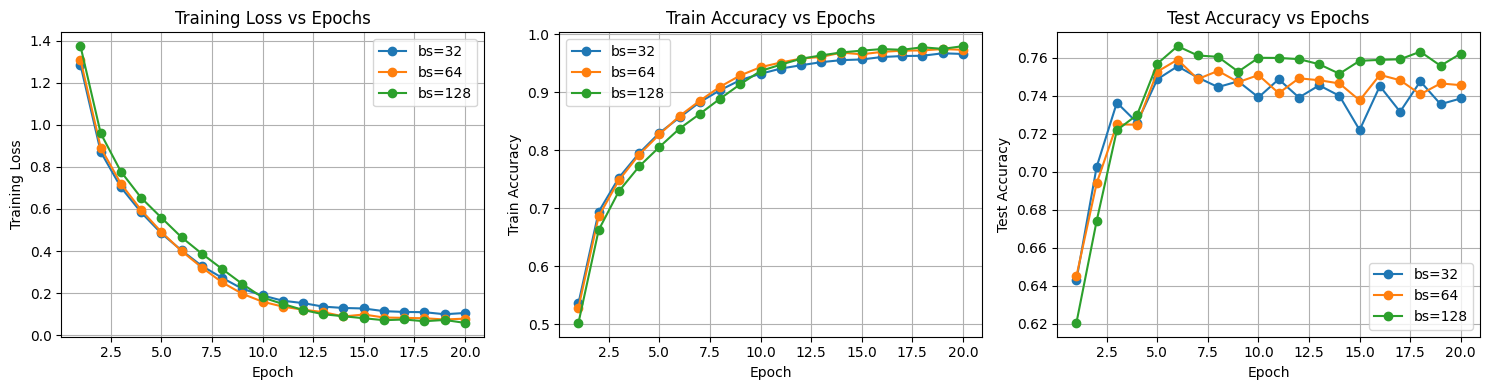

In [ ]:
# Compare batch sizes [32, 64, 128] at lr=0.001 and plot loss/train acc/test acc over epochs
# Uses existing objects: train_dataset, test_dataset, SimpleCNN, criterion_cnn, device, n_epochs

lr = 0.001
batch_sizes = [32, 64, 128]
history_bs = {}

for bs in batch_sizes:
    torch.manual_seed(0)
    np.random.seed(0)

    train_loader_bs = DataLoader(train_dataset, batch_size=bs, shuffle=True)
    test_loader_bs  = DataLoader(test_dataset,  batch_size=bs, shuffle=False)

    model = SimpleCNN(num_classes=10).to(device)
    optimizer = optim.Adam(model.parameters(), lr=lr)

    train_losses, train_accs, test_accs = train_cnn(model, optimizer, train_loader_bs, test_loader_bs)

    history_bs[bs] = {'loss': train_losses, 'train_acc': train_accs, 'test_acc': test_accs}

    # free memory
    del model, optimizer
    torch.cuda.empty_cache() if torch.cuda.is_available() else None

# Plot comparisons
epochs = range(1, n_epochs + 1)
plt.figure(figsize=(15,4))

plt.subplot(1,3,1)
for bs in batch_sizes:
    plt.plot(epochs, history_bs[bs]['loss'], marker='o', label=f"bs={bs}")
plt.xlabel("Epoch"); plt.ylabel("Training Loss"); plt.title("Training Loss vs Epochs"); plt.grid(True); plt.legend()

plt.subplot(1,3,2)
for bs in batch_sizes:
    plt.plot(epochs, history_bs[bs]['train_acc'], marker='o', label=f"bs={bs}")
plt.xlabel("Epoch"); plt.ylabel("Train Accuracy"); plt.title("Train Accuracy vs Epochs"); plt.grid(True); plt.legend()

plt.subplot(1,3,3)
for bs in batch_sizes:
    plt.plot(epochs, history_bs[bs]['test_acc'], marker='o', label=f"bs={bs}")
plt.xlabel("Epoch"); plt.ylabel("Test Accuracy"); plt.title("Test Accuracy vs Epochs"); plt.grid(True); plt.legend()

plt.tight_layout()
plt.show()


In [ ]:

# Short discussion (printed)
print("\nDiscussion (brief):")
print("- Smaller batch sizes (e.g. 32) produce noisier gradient estimates: training curves are more noisy but updates are more frequent per epoch.")
print("- Larger batches (e.g. 128) give smoother, more stable training curves per epoch but fewer parameter updates per epoch and sometimes worse generalization.")
print("- Medium batches (e.g. 64) often strike a balance between stability and generalization.")
print("- Inspect the plotted curves to see which batch size gives fastest decrease in loss and best final test accuracy for this setup; conclusions can depend on model, dataset, and number of epochs.")

### 6.2.c: Using RMS Prop

lr=0.001 Epoch 01/20 - loss: 1.4001 - train_acc: 0.4976 - test_acc: 0.4230
lr=0.001 Epoch 02/20 - loss: 0.9466 - train_acc: 0.6670 - test_acc: 0.6299
lr=0.001 Epoch 03/20 - loss: 0.7571 - train_acc: 0.7337 - test_acc: 0.6463
lr=0.001 Epoch 04/20 - loss: 0.6200 - train_acc: 0.7833 - test_acc: 0.6961
lr=0.001 Epoch 05/20 - loss: 0.5123 - train_acc: 0.8205 - test_acc: 0.7065
lr=0.001 Epoch 06/20 - loss: 0.4112 - train_acc: 0.8555 - test_acc: 0.6903
lr=0.001 Epoch 07/20 - loss: 0.3249 - train_acc: 0.8846 - test_acc: 0.7318
lr=0.001 Epoch 08/20 - loss: 0.2517 - train_acc: 0.9113 - test_acc: 0.7404
lr=0.001 Epoch 09/20 - loss: 0.1952 - train_acc: 0.9314 - test_acc: 0.7356
lr=0.001 Epoch 10/20 - loss: 0.1580 - train_acc: 0.9440 - test_acc: 0.7313
lr=0.001 Epoch 11/20 - loss: 0.1288 - train_acc: 0.9546 - test_acc: 0.7388
lr=0.001 Epoch 12/20 - loss: 0.1121 - train_acc: 0.9614 - test_acc: 0.7521
lr=0.001 Epoch 13/20 - loss: 0.1047 - train_acc: 0.9644 - test_acc: 0.7475
lr=0.001 Epoch 14/20 - lo

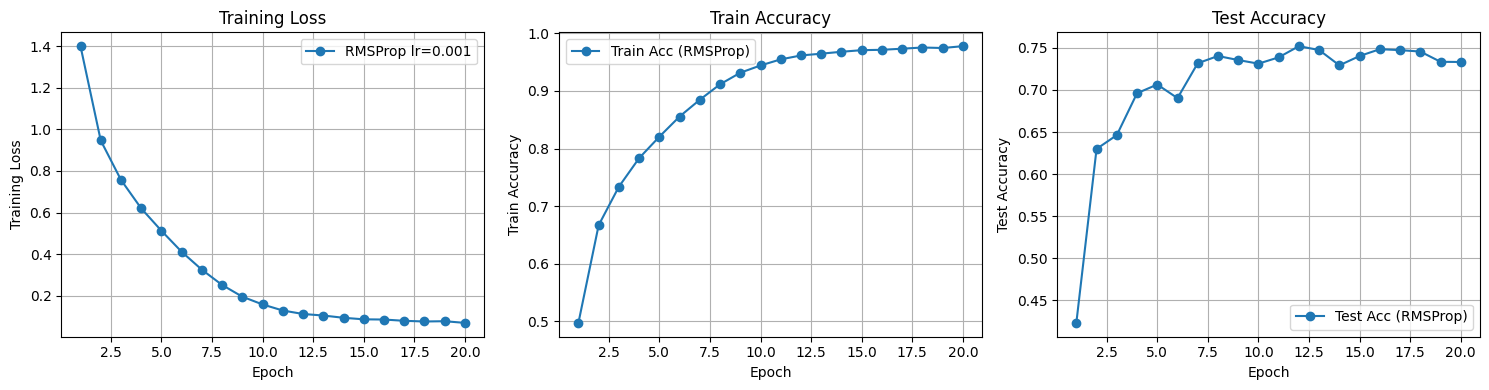

RMSProp: train_acc=0.9775, test_acc=0.7333


In [ ]:
# Train SimpleCNN with RMSProp (lr=0.001, batch_size=64) and plot loss/accuracy curves.
torch.manual_seed(0)
np.random.seed(0)

# Hyperparameters
lr = 0.001
n_epochs = 20
batch_size = 64

# instantiate model and RMSProp optimizer
model_rms = SimpleCNN(num_classes=10).to(device)
optimizer_rms = optim.RMSprop(model_rms.parameters(), lr=0.001)

# train using existing helper
train_losses_rms, train_accs_rms, test_accs_rms = train_cnn(
    model_rms, optimizer_rms, train_loader, test_loader
)

# Plot results
epochs = range(1, n_epochs + 1)

plt.figure(figsize=(15,4))

plt.subplot(1,3,1)
plt.plot(epochs, train_losses_rms, marker='o', label='RMSProp lr=0.001')
plt.xlabel("Epoch"); plt.ylabel("Training Loss"); plt.title("Training Loss")
plt.grid(True); plt.legend()

plt.subplot(1,3,2)
plt.plot(epochs, train_accs_rms, marker='o', label='Train Acc (RMSProp)')
plt.xlabel("Epoch"); plt.ylabel("Train Accuracy"); plt.title("Train Accuracy")
plt.grid(True); plt.legend()

plt.subplot(1,3,3)
plt.plot(epochs, test_accs_rms, marker='o', label='Test Acc (RMSProp)')
plt.xlabel("Epoch"); plt.ylabel("Test Accuracy"); plt.title("Test Accuracy")
plt.grid(True); plt.legend()

plt.tight_layout()
plt.show()

# print final metrics
print(f"RMSProp: train_acc={train_accs_rms[-1]:.4f}, test_acc={test_accs_rms[-1]:.4f}")

lr=0.001 Epoch 01/20 - loss: 1.4342 - train_acc: 0.4825 - test_acc: 0.6076
lr=0.001 Epoch 02/20 - loss: 1.0245 - train_acc: 0.6402 - test_acc: 0.6796
lr=0.001 Epoch 03/20 - loss: 0.8657 - train_acc: 0.6964 - test_acc: 0.7206
lr=0.001 Epoch 04/20 - loss: 0.7547 - train_acc: 0.7372 - test_acc: 0.7330
lr=0.001 Epoch 05/20 - loss: 0.6658 - train_acc: 0.7679 - test_acc: 0.7553
lr=0.001 Epoch 06/20 - loss: 0.5971 - train_acc: 0.7919 - test_acc: 0.7399
lr=0.001 Epoch 07/20 - loss: 0.5361 - train_acc: 0.8130 - test_acc: 0.7629
lr=0.001 Epoch 08/20 - loss: 0.4920 - train_acc: 0.8276 - test_acc: 0.7685
lr=0.001 Epoch 09/20 - loss: 0.4512 - train_acc: 0.8383 - test_acc: 0.7734
lr=0.001 Epoch 10/20 - loss: 0.4077 - train_acc: 0.8537 - test_acc: 0.7666
lr=0.001 Epoch 11/20 - loss: 0.3741 - train_acc: 0.8651 - test_acc: 0.7626
lr=0.001 Epoch 12/20 - loss: 0.3525 - train_acc: 0.8744 - test_acc: 0.7700
lr=0.001 Epoch 13/20 - loss: 0.3208 - train_acc: 0.8851 - test_acc: 0.7659
lr=0.001 Epoch 14/20 - lo

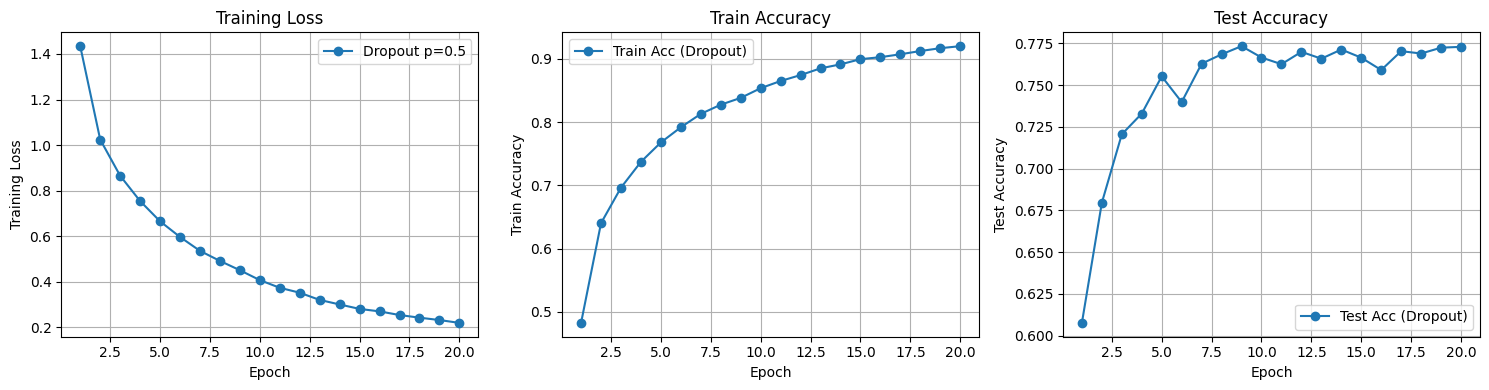

Dropout (p=0.5): final_train_acc=0.9201, final_test_acc=0.7730


In [25]:
# Modified CNN with Dropout after the first Linear layer (p=0.5)
class SimpleCNN_Dropout(nn.Module):
    def __init__(self, num_classes=10, p_drop=0.5):
        super().__init__()
        self.features = nn.Sequential(
            nn.Conv2d(3, 32, kernel_size=3, padding=1), nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2),
            nn.Conv2d(32, 64, kernel_size=3, padding=1), nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2),
            nn.Conv2d(64, 128, kernel_size=3, padding=1), nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2)
        )
        # Add Dropout after the first Linear layer (i.e., Linear -> Dropout -> ReLU)
        self.classifier = nn.Sequential(
            nn.Flatten(),
            nn.Linear(128 * 4 * 4, 256),
            nn.Dropout(p=p_drop),
            nn.ReLU(),
            nn.Linear(256, num_classes)
        )

    def forward(self, x):
        x = self.features(x)
        x = self.classifier(x)
        return x

# Reproducible run with batch_size=64 and lr=0.001 (existing train_loader/test_loader used)
torch.manual_seed(0)
np.random.seed(0)

model_do = SimpleCNN_Dropout(num_classes=10, p_drop=0.5).to(device)
optimizer_do = optim.Adam(model_do.parameters(), lr=0.001)

train_losses_do, train_accs_do, test_accs_do = train_cnn(model_do, optimizer_do, train_loader, test_loader)

# Plot results
epochs = range(1, n_epochs + 1)
plt.figure(figsize=(15,4))

plt.subplot(1,3,1)
plt.plot(epochs, train_losses_do, marker='o', label='Dropout p=0.5')
plt.xlabel("Epoch"); plt.ylabel("Training Loss"); plt.title("Training Loss")
plt.grid(True); plt.legend()

plt.subplot(1,3,2)
plt.plot(epochs, train_accs_do, marker='o', label='Train Acc (Dropout)')
plt.xlabel("Epoch"); plt.ylabel("Train Accuracy"); plt.title("Train Accuracy")
plt.grid(True); plt.legend()

plt.subplot(1,3,3)
plt.plot(epochs, test_accs_do, marker='o', label='Test Acc (Dropout)')
plt.xlabel("Epoch"); plt.ylabel("Test Accuracy"); plt.title("Test Accuracy")
plt.grid(True); plt.legend()

plt.tight_layout()
plt.show()

# Print final metrics and short observation
final_train = train_accs_do[-1]
final_test  = test_accs_do[-1]
print(f"Dropout (p=0.5): final_train_acc={final_train:.4f}, final_test_acc={final_test:.4f}")

In [ ]:
print("\nObservation (brief):")
print("- Adding Dropout (p=0.5) after the first linear layer typically reduces training accuracy and can slow convergence slightly.")
print("- Dropout often reduces overfitting: if test accuracy is similar or improved compared to the non-dropout run, generalization improved.")
print("- Inspect the plotted curves and final metrics to judge the trade-off for this setup (lower train acc vs. potentially better test acc).")

lr=0.001 Epoch 01/20 - loss: 1.1538 - train_acc: 0.5877 - test_acc: 0.6651
lr=0.001 Epoch 02/20 - loss: 0.8018 - train_acc: 0.7169 - test_acc: 0.7126
lr=0.001 Epoch 03/20 - loss: 0.6648 - train_acc: 0.7664 - test_acc: 0.7346
lr=0.001 Epoch 04/20 - loss: 0.5684 - train_acc: 0.8018 - test_acc: 0.7541
lr=0.001 Epoch 05/20 - loss: 0.4898 - train_acc: 0.8271 - test_acc: 0.7641
lr=0.001 Epoch 06/20 - loss: 0.4223 - train_acc: 0.8524 - test_acc: 0.7783
lr=0.001 Epoch 07/20 - loss: 0.3603 - train_acc: 0.8723 - test_acc: 0.7721
lr=0.001 Epoch 08/20 - loss: 0.3013 - train_acc: 0.8937 - test_acc: 0.7689
lr=0.001 Epoch 09/20 - loss: 0.2553 - train_acc: 0.9089 - test_acc: 0.7870
lr=0.001 Epoch 10/20 - loss: 0.2103 - train_acc: 0.9252 - test_acc: 0.7649
lr=0.001 Epoch 11/20 - loss: 0.1737 - train_acc: 0.9380 - test_acc: 0.7790
lr=0.001 Epoch 12/20 - loss: 0.1586 - train_acc: 0.9435 - test_acc: 0.7882
lr=0.001 Epoch 13/20 - loss: 0.1291 - train_acc: 0.9550 - test_acc: 0.7661
lr=0.001 Epoch 14/20 - lo

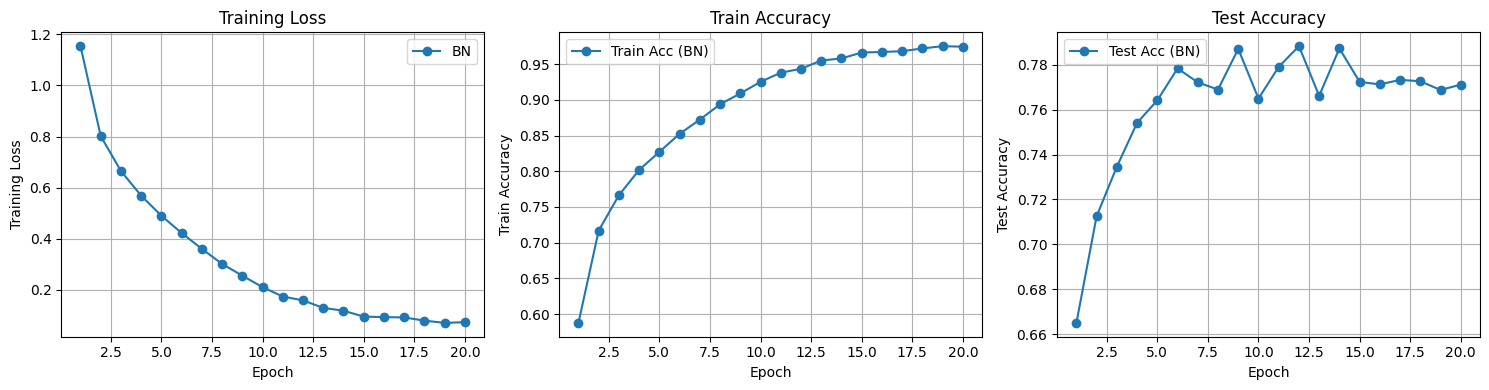

BN: train_acc=0.9744, test_acc=0.7711


In [26]:
# CNN with BatchNorm2d before each MaxPool2d
class CNN_BN(nn.Module):
    def __init__(self, num_classes=10):
        super().__init__()
        self.features = nn.Sequential(
            nn.Conv2d(3, 32, kernel_size=3, padding=1),
            nn.BatchNorm2d(32),   # BN matches out channels of previous Conv2d
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2),

            nn.Conv2d(32, 64, kernel_size=3, padding=1),
            nn.BatchNorm2d(64),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2),

            nn.Conv2d(64, 128, kernel_size=3, padding=1),
            nn.BatchNorm2d(128),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2)
        )
        self.classifier = nn.Sequential(
            nn.Flatten(),
            nn.Linear(128 * 4 * 4, 256),
            nn.ReLU(),
            nn.Linear(256, num_classes)
        )

    def forward(self, x):
        x = self.features(x)
        x = self.classifier(x)
        return x

# Reproducible training run
torch.manual_seed(0)
np.random.seed(0)

model_bn = CNN_BN(num_classes=10).to(device)
optimizer_bn = optim.Adam(model_bn.parameters(), lr=lr)

train_losses_bn, train_accs_bn, test_accs_bn = train_cnn(model_bn, optimizer_bn, train_loader, test_loader)

# Plot training loss, training accuracy and testing accuracy over epochs
epochs = range(1, n_epochs + 1)
plt.figure(figsize=(15,4))

plt.subplot(1,3,1)
plt.plot(epochs, train_losses_bn, marker='o', label='BN')
plt.xlabel("Epoch"); plt.ylabel("Training Loss"); plt.title("Training Loss")
plt.grid(True); plt.legend()

plt.subplot(1,3,2)
plt.plot(epochs, train_accs_bn, marker='o', label='Train Acc (BN)')
plt.xlabel("Epoch"); plt.ylabel("Train Accuracy"); plt.title("Train Accuracy")
plt.grid(True); plt.legend()

plt.subplot(1,3,3)
plt.plot(epochs, test_accs_bn, marker='o', label='Test Acc (BN)')
plt.xlabel("Epoch"); plt.ylabel("Test Accuracy"); plt.title("Test Accuracy")
plt.grid(True); plt.legend()

plt.tight_layout()
plt.show()

print(f"BN: train_acc={train_accs_bn[-1]:.4f}, test_acc={test_accs_bn[-1]:.4f}")


In [ ]:

# Brief observation
print("\nObservation (brief):")
print("- Adding BatchNorm before each pooling typically stabilizes and speeds up training: loss curve is smoother and often decreases faster.")
print("- BatchNorm can improve generalization; check whether test accuracy is higher or the train/test gap is reduced compared to previous runs (Adam / RMSProp / Dropout).")
print("- If you observe noisy training or slower convergence without BN, the BN version should look more stable in the plots above.")